# BERTopic

At this stage, the data is reading for Topic Modeling. We are using the
BERTopic package and follow the tutorial notebook provided by the
author.

In [5]:
!pip install -q bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00

In the following cells we download a stopword dictionary for the German
language and applied it according to [the
documentation](https://maartengr.github.io/BERTopic/faq.html#how-do-i-remove-stop-words)

In [10]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

STOPWORDS = stopwords.words('german')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=STOPWORDS)

Now we’re ready to create our corpus in `docs`, a list of text documents
to pass to `BERTopic`.

In [ ]:
# We create our corpus
docs = df['Text']

In [30]:
from bertopic import BERTopic

# We're dealing with German texts, therefore we choose 'multilingual'. When dealing with English texts exclusively, choose 'english'
topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True, vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(docs)

2023-12-01 08:52:44,038 - BERTopic - Embedding - Transforming documents to embeddings.

2023-12-01 08:52:50,561 - BERTopic - Embedding - Completed ✓
2023-12-01 08:52:50,563 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-01 08:53:04,597 - BERTopic - Dimensionality - Completed ✓
2023-12-01 08:53:04,599 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-01 08:53:05,103 - BERTopic - Cluster - Completed ✓
2023-12-01 08:53:05,109 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-01 08:53:05,639 - BERTopic - Representation - Completed ✓

**The following cells have been copied from the [BERTopic
Tutorial](https://github.com/MaartenGr/BERTopic/blob/master/notebooks/BERTopic.ipynb).**
Please check the linked notebook for more functions and the
documentation for more background information.

## Extracting Topics

After fitting our model, we can start by looking at the results.
Typically, we look at the most frequent topics first as they best
represent the collection of documents.

In [31]:
freq = topic_model.get_topic_info(); freq.head(5)

-1 refers to all outliers and should typically be ignored. Next, let’s
take a look at a frequent topic that were generated:

In [32]:
len(freq)

52

We have a total of 52 topics

In [33]:
topic_model.get_topic(0)  # Select the most frequent topic

[('wählen', 0.01628736425293884),
 ('fdp', 0.01626632927971954),
 ('hessen', 0.013634118460503969),
 ('heute', 0.013441948777152065),
 ('stimme', 0.011907460231710654),
 ('stimmen', 0.011505832701270827),
 ('landtagswahl', 0.011272934711858047),
 ('wahlkampf', 0.01059385752962746),
 ('sonntag', 0.01057520846171656),
 ('bayern', 0.010322807358750668)]

### Visualize Topics

After having trained our `BERTopic` model, we can iteratively go through
perhaps a hundred topic to get a good understanding of the topics that
were extract. However, that takes quite some time and lacks a global
representation. Instead, we can visualize the topics that were generated
in a way very similar to [LDAvis](https://github.com/cpsievert/LDAvis):

In [ ]:
topic_model.visualize_topics()

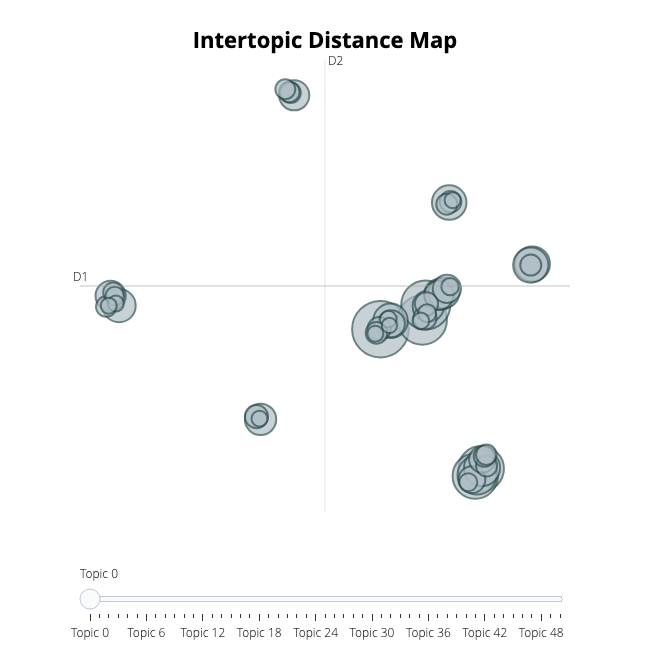

### Visualize Terms

We can visualize the selected terms for a few topics by creating bar
charts out of the c-TF-IDF scores for each topic representation.
Insights can be gained from the relative c-TF-IDF scores between and
within topics. Moreover, you can easily compare topic representations to
each other.

In [ ]:
topic_model.visualize_barchart(top_n_topics=15)

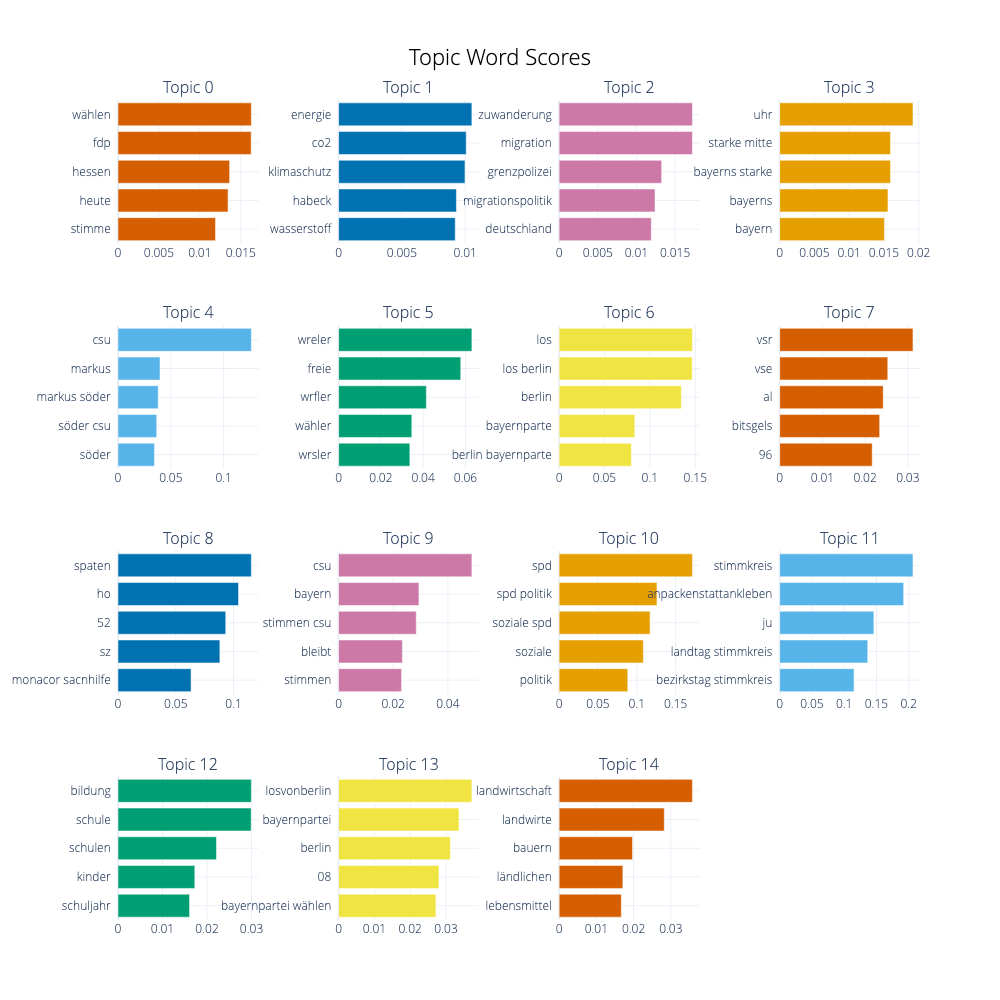

### Topic Reduction

We can also reduce the number of topics after having trained a BERTopic
model. The advantage of doing so, is that you can decide the number of
topics after knowing how many are actually created. It is difficult to
predict before training your model how many topics that are in your
documents and how many will be extracted. Instead, we can decide
afterwards how many topics seems realistic:

In [36]:
topic_model.reduce_topics(docs, nr_topics=15)

2023-12-01 08:53:07,148 - BERTopic - Topic reduction - Reducing number of topics
2023-12-01 08:53:07,642 - BERTopic - Topic reduction - Reduced number of topics from 52 to 15

### Visualize Terms After Reduction

In [ ]:
topic_model.visualize_barchart(top_n_topics=15)

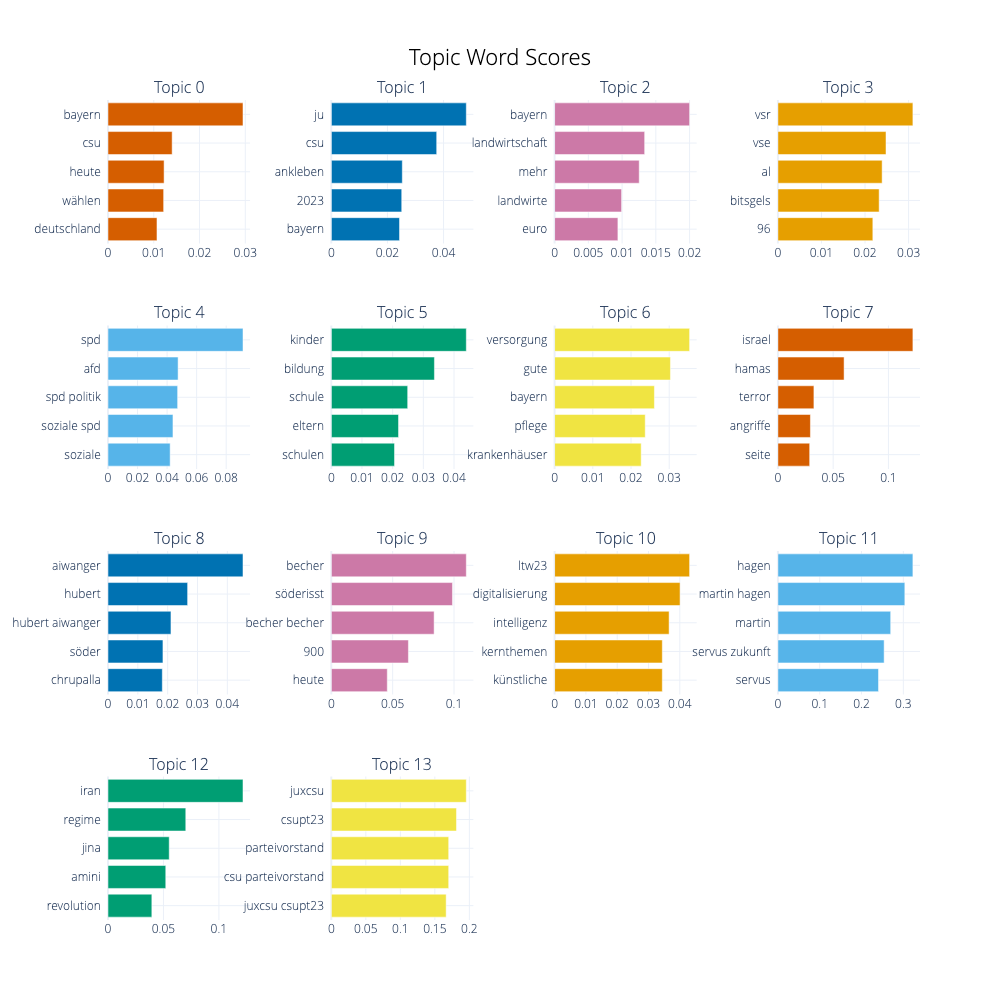

### Saving the model

The model and its internal settings can easily be saved. Note that the
documents and embeddings will not be saved. However, UMAP and HDBSCAN
will be saved.

In [38]:
# Save model
topic_model.save("/content/drive/MyDrive/2023-12-01-LTW23-CrowdTangle-Posts-model")

2023-12-01 08:53:54,135 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.